## **演示0401：导数的概念**

### **导数定义**
* 设函数$y=f(x)$在点$x_0$的某个邻域内有定义，当自变量$x$在$x_0$处有增量$\Delta x$，且$(x_0+\Delta x)$也在该邻域内时，相应的函数取得增量：$ \Delta y=f(x_0+\Delta x)-f(x_0) $  
![](../images/040101.png)  
* 如果当$ \Delta x \to 0 $时，$ \frac{\Delta y}{\Delta x} $之比的极限存在，则称函数$y=f(x)$在点$x_0$处可导，并且该极限值称为函数$y=f(x)$在点$x_0$处的导数，可记作：$f'(x_0)$，或者：$y'|x=x_0$，或者：$\dfrac{dy}{dx}|x=x_0$
* 导数的数值计算方法：$f'(x_0)=\lim_{\Delta x \to 0} \dfrac{\Delta y}{\Delta x}=\lim_{\Delta x \to 0} {\dfrac{f(x_0 + \Delta x)-f(x_0)}{\Delta x}} $，有时候也用：$f'(x_0)=\lim_{\Delta x \to 0} {\dfrac{f(x_0 + \Delta x)-f(x_0 - \Delta x)}{2\Delta x}} $
* 函数$y=f(x)$在点$x_0$的导数，就是函数$f(x)$在点$(x_0, f(x_0))$处的切线的斜率

### **案例1：观察导数和斜率**
>  
* 做出函数$y=x^2$的曲线图
* 计算该函数在x=1.5处的导数(切线斜率)
* 绘制通过该点的切线

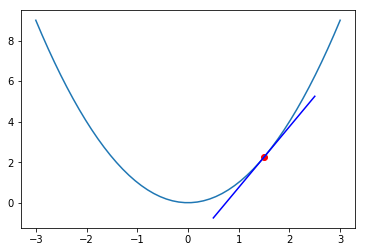

In [2]:
''' 使用导数的定义计算某个点的导数值，并绘制该点的切线 '''

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def fun(x):
    return x*x

x = np.linspace(-3, 3, 50)
y = fun(x)

x0 = 1.5
y0 = fun(x0)

delta_x = 1e-4
x1 = x0 + delta_x
y1 = fun(x1)
delta_y = y1 - y0

coef= delta_y / delta_x    # 斜率
intecept = y0 - coef*x0    # 截距

plt.plot(x, y)
# 绘制穿过x0点的斜率值线
x_left = x0 - 1
y_left = coef*x_left + intecept
x_right = x0 + 1
y_right = coef*x_right + intecept
plt.plot([x_left,x_right], [y_left, y_right], 'b')

plt.scatter(x0, fun(x0), color='r')
plt.show()

### **使用分析法求导数**
* 在很多情况下，用前述数值方法计算导数会导致较大的计算量。因此，也常用分析法来计算导数。在分析法中，首先需要获得函数$f(x)$的导函数
* 如果函数$y=f(x)$在开区间内每一点都可导，就称函数在$f(x)$在该区间内可导。此时$f(x)$对于在区间内的每一个确定的$x$值，都对应着一个确定的导数值，从而构成一个新函数，即原来函数$y=f(x)$的导函数，记作：$y', f'(x), \dfrac{dy}{dx} $ 或者$\dfrac{df(x)}{dx}$。导函数也简称导数
* 常见函数的导函数：
 * $y=C$ ($C$为常数): $y'=0$
 * $y=x^n$ ($n$为常数)：$y'=n \cdot x^{n-1}$
 * $y=a^x$ ($a$为常数)：$y'=a^x \cdot \ln a$
 * $y=\log_a^x$ ($a$为常数)：$y'=\dfrac{1}{x \ln a}$
 * $y=sinx$：$y'=cosx$
 * $y=cosx$：$y'=-sinx$
 * $y=tanx$：$y'=sec^2 x$
 * $y=cotx$：$y'=-csc^2 x$
* 导数的复合运算：
 * $(Cu)'=Cu'$ ($C$为常数)
 * $(u \pm v)'=u' \pm v' $
 * $(uv)'= u'v + uv' $
 * $(u/v)'=\dfrac{u'v - uv'}{v^2} $

### **复杂函数的链式求导**
* 链式求导法则：复合函数$F(x)$对自变量$x$的导数，等于该函数对中间变量$t$的导数$F'(t)$，乘以中间变量对自变量的导数$T'(x)$
* 示例1：计算函数$F(x)=(3x^2-2x+1)^2 $的导数
 * 设：$ t=3x^2-2x+1 $
 * 则：$ F(t)=t^2, t(x)=3x^2-2x+1 $
 * 因此：$ F'(x)=F'(t) \cdot t'(x)=(2 \cdot t) \cdot (3 \cdot 2 \cdot x-2+0)=2 \cdot (3x^2-2x+1) \cdot (6x -2) $
* 示例2：计算函数$F(x)=\dfrac{1}{1+e^{-x}}$的导数
 * 设：$ t=1+e^{-x} $
 * 则：$ F(t)=t^{-1},t(x)=1+e^{-x} $
 * 因此：  
$ \begin{aligned}
F'(x)&=F'(t) \cdot t'(x)=-t^{-2} \cdot (e^{-x} \cdot (-1))\\ \\
&=\dfrac{1}{1+e^{-x}} \cdot \dfrac{e^{-x}}{1+e^{-x}}=\dfrac{1}{1+e^{-x}} \cdot (1-\dfrac{1}{1+e^{-x}}) \\ \\
&=F(x) \cdot (1-F(x))
\end{aligned} $

### **案例2：以数值法和分析法分别计算导数**
* 计算函数$F(x)=\dfrac{1}{1+e^{-x}}$在$x=-1.0, -0.5, -0.25, 0, 0.25, 0.5, 1.0$时的导数
* *scipy.misc.derivative*可直接用于求导数

In [3]:
''' 分别以数值发和分析法计算导数值并比较结果 '''
import numpy as np
from scipy.misc import derivative

def f(x):
    return 1.0 / (1.0 + np.exp(-x))

x = np.linspace(-1.0, 1.0, 7)

# 数值方法求导数
delta_x = 1e-6
dir_numerical = (f(x + delta_x) - f(x)) / delta_x

# 分析方法求导数
def dir_f(x):
    return f(x)*(1-f(x))

dir_analytical = dir_f(x)

# 采用scipy求导数
dir_scipy = derivative(f, x, dx=1e-6)    # dx用于指定导数计算时的x微小偏移量

# 对比对应元素的值，其差距应该非常小
print(dir_numerical)
print(dir_analytical)
print(dir_scipy)

[0.19661198 0.22415743 0.24318218 0.25       0.24318214 0.22415735
 0.19661189]
[0.19661193 0.22415739 0.24318216 0.25       0.24318216 0.22415739
 0.19661193]
[0.19661193 0.22415739 0.24318216 0.25       0.24318216 0.22415739
 0.19661193]


### **偏导数**
* 针对一个变量求偏导时，可以把其它变量视为常数
* 示例1：求函数$ f(x,y)=x^2+2xy+y^2 $ 的偏导数
 * 需要针对自变量$x$和$y$分别来求。
 * 也可以看成在$xoy$平面内，分别求沿$x$方向的导数和$y$方向的导数。
 * $ \dfrac{\partial f}{\partial x}= \dfrac{\partial(x^2+2xy+y^2)}{\partial x}= \dfrac{\partial{x^2}+\partial{(2xy)}+\partial{y^2}}{\partial x}=2x+2y+0=2x+2y $
 * $ \dfrac{\partial f}{\partial y}= \dfrac{\partial(x^2+2xy+y^2)}{\partial y}= \dfrac{\partial{x^2}+\partial{(2xy)}+\partial{y^2}}{\partial y}=0+2x+2y=2x+2y $